## Imports

In [1]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mick/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer # For sentiment analysis
import cPickle as pickle # For loaded dataset from pickle file
import tqdm # Progress bar
from collections import Counter # Handy addon
from pprint import pprint # Useful to print JSON objects
import numpy as np

/Users/mick/anaconda/envs/227/lib/python2.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
# This loads the file that you want, might take several seconds (up to a minute)

with open("news_sentiment.pickle", "r") as f:
    articles = pickle.load(f)
print len(articles), "articles were loaded"
print "Example article:"
pprint(articles[1040])


57767 articles were loaded
Example article:
{u'introductions': [{u'person': u'Bashar al-Assad',
                     u'text': u'President',
                     u'wdid': u'Q44329'},
                    {u'person': u'Emile Hokayem',
                     u'text': u'in Foreign Policy'},
                    {u'person': u'Ahrar al Sham',
                     u'text': u'the most important groups',
                     u'wdid': u'Q860943'},
                    {u'person': u'Vladimir Putin',
                     u'text': u'Russian President',
                     u'wdid': u'Q7747'},
                    {u'person': u'Barack Obama',
                     u'text': u'U.S. President',
                     u'wdid': u'Q76'},
                    {u'person': u'Osama Abu Zeid',
                     u'text': u'a senior adviser to the moderate Free Syrian Army'},
                    {u'person': u'Op-Ed',
                     u'text': u'for The Washington Post',
                     u'wdid': u'Q2602337'},
 

In [4]:
# separate articles from the two stories
ISIS_articles = []
Brexit_articles = []
for a in articles:
    if a["news_topic"] == 'ISIS War':
        ISIS_articles.append(a)
    else:
        Brexit_articles.append(a)
        
print len(ISIS_articles), " articles from ISIS War and ", len(Brexit_articles), "articles from Brexit were loaded"

39206  articles from ISIS War and  18561 articles from Brexit were loaded


In [5]:
# get only articles from one story, you can change this
articles = ISIS_articles

## Extract introductions, and obtain their sentiment

In [6]:
analyzer = SentimentIntensityAnalyzer()

total_introductions = []
for a in articles:
    for intro in a.get('introductions', []):
        intro['source'] = a['source']
        total_introductions.append(intro)

for intro in tqdm.tqdm_notebook(total_introductions):
    intro['sentiment'] = analyzer.polarity_scores(intro['text'])['compound']

In [7]:
# Example some sentiment for some of the introductions

subsample = np.random.choice(total_introductions, 100)
for intro in subsample:
    if intro['sentiment'] != 0:
        print "---------------"
        print "Entity mentionned:", intro['person']
        print intro['text']
        print "Sentiment:", intro['sentiment']

---------------
Entity mentionned: Abdullah Ocalan
the family of jailed Kurdistan Workers Party
Sentiment: -0.128
---------------
Entity mentionned: Ryan Dillon
" The enemy is completely surrounded
Sentiment: -0.5423
---------------
Entity mentionned: Moqtada al-Sadr
powerful Shi'ite Muslim cleric
Sentiment: 0.4215
---------------
Entity mentionned: Ahmad Jarba
who , " We thank Secretary Kerry for his strong comments in support of the Syrian people 's struggle for freedom & dignity . "
Sentiment: 0.9201
---------------
Entity mentionned: Sami al-Aridi
of the special forces
Sentiment: 0.4019
---------------
Entity mentionned: Charles Schumer
the minority leader in the United States Senate
Sentiment: 0.4215
---------------
Entity mentionned: Erdogan
discussing how to hide large sums of money
Sentiment: -0.1779
---------------
Entity mentionned: Liwa al-Islam
one of the opposition fighting units around Damascus
Sentiment: -0.3612
---------------
Entity mentionned: Raqqa
the now - destroye

## Build a 2-dimensional object containing sentiment per entity, per source

In [8]:
ent_source_sent = {}

for intro in total_introductions:
    p = intro['person']
    s = intro['source']
    if p not in ent_source_sent:
        ent_source_sent[p] = {}
    if s not in ent_source_sent[p]:
        ent_source_sent[p][s] = []
    ent_source_sent[p][s].append(intro['sentiment'])

In [9]:
# An example of how one entity (a city) is described by different sources

print ent_source_sent['Aleppo']

{u'nytimes.com': [0.0, -0.1531, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1531, 0.0, 0.0, 0.0, -0.1531, 0.0, 0.0, -0.5574, 0.0, 0.0, 0.0, 0.0], u'allafrica.com': [-0.5994], u'bloomberg.com': [-0.5994, 0.0, 0.0, -0.2023, 0.0, -0.4404, -0.1531, -0.1531, 0.0, 0.0], u'bbc.co.uk': [0.0516, 0.0, -0.1531, 0.0, 0.0, 0.0, -0.1531, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1531, -0.3182, -0.5994, -0.5994, 0.0, 0.0, 0.0, -0.1531, 0.0, 0.0, 0.0, -0.1531, 0.0, 0.0, 0.0], u'theguardian.com': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.7096, 0.0, -0.1531, 0.0], u'telegraph.co.uk': [0.4019, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.3612, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3182, 0.4404, -0.296, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3818, -0.1531, 0.0, -0.1531, 0.0, 0.0, 0.0, -0.3182, -0.1531, 0.0, 0.0, 0.0, 0.0, 0.0, -0.3612, 0.2023, -0.1531, 0.0, 0.0, -0.1531, -0.1531, 

In [10]:
# We get rid of entities that don't contain enough data

entities_kept = []

for entity in ent_source_sent.keys():
    sentiments = ent_source_sent[entity]
    total_size = sum([len(sentiments[source]) for source in sentiments.keys()])
    if total_size >= 3:
        entities_kept.append(entity)
        
print "We will keep a total of", len(entities_kept), " / ", len(ent_source_sent.keys()) ,"in our dataset"

sources = set([])
for entity in entities_kept:
    sources|= set(ent_source_sent[entity].keys())
sources = list(sources)

print "We have ", len(sources), "sources: ", sources

We will keep a total of 7852  /  25128 in our dataset
We have  22 sources:  [u'telegraph.co.uk', u'foxnews.com', u'ap.org', u'businessinsider.in', u'independent.co.uk', u'reuters.com', u'wikinews.org', u'cnn.com', u'techcrunch.com', u'aa.com.tr', u'allafrica.com', u'nytimes.com', u'bloomberg.com', u'bbc.co.uk', u'latimes.com', u'rt.com', u'france24.com', u'chinadaily.com.cn', u'theguardian.com', u'washingtonpost.com', u'middleeasteye.net', u'aljazeera.com']


## We create the array we will use in our sparse model

In [11]:
# Parameters: changing these affects the results you get
Pos_neg_ratio = 2.0
overall_ratio = 0.15
pos_threshold = 0.15
neg_threshold = -0.15

N = len(entities_kept)
M = len(sources)
A = np.zeros((N, M))

sentiment_counts = Counter()

source2j = {source: j for j, source in enumerate(sources)}

for i, entity in enumerate(entities_kept):
    for source in ent_source_sent[entity].keys():
        sent_array = np.array(ent_source_sent[entity][source])
        N_pos = float(len(np.where(sent_array > pos_threshold)[0]))
        N_neg = float(len(np.where(sent_array < neg_threshold)[0]))
        T = float(len(sent_array))
        aggregate_sentiment = 0
        if N_pos > Pos_neg_ratio*N_neg and N_pos > overall_ratio*T:
            aggregate_sentiment = 1
        elif N_neg > Pos_neg_ratio*N_pos and N_neg > overall_ratio*T:
            aggregate_sentiment = -1
        j = source2j[source]
        
        A[i,j] = aggregate_sentiment
        
        sentiment_counts[aggregate_sentiment] += 1

print "We allocated some sentiment in this matrix, the repartition is:", sentiment_counts

We allocated some sentiment in this matrix, the repartition is: Counter({0: 19061, 1: 3650, -1: 2670})


## Model source similarity

In [12]:
# Write code that uses this matrix (entities, sources) to compute
# source similarity visible in bias of the way they describe entities

In [13]:
def print_positive(precision, sources):
    for (i, j) in zip(*np.where(precision > 0)):
        if i > j:
            print sources[i], sources[j]

## Default implementation

In [15]:
from sklearn.covariance import GraphLasso

for i in range(3,10):
    l1_lambda = 10**(-i)
    print("Lamda: ", l1_lambda)

    graph_lasso = GraphLasso(alpha=l1_lambda)
    graph_lasso.fit(A)
    np.mean(graph_lasso.get_precision() > 0)
    default_graph = graph_lasso.get_precision()

    print_positive(default_graph, sources)
    print("----")


('Lamda: ', 0.001)
reuters.com ap.org
----
('Lamda: ', 0.0001)
businessinsider.in foxnews.com
reuters.com ap.org
cnn.com ap.org
nytimes.com ap.org
latimes.com reuters.com
rt.com ap.org
rt.com businessinsider.in
france24.com ap.org
france24.com allafrica.com
france24.com latimes.com
washingtonpost.com chinadaily.com.cn
middleeasteye.net nytimes.com
middleeasteye.net washingtonpost.com
----
('Lamda: ', 1e-05)
businessinsider.in foxnews.com
reuters.com ap.org
wikinews.org ap.org
wikinews.org businessinsider.in
wikinews.org independent.co.uk
wikinews.org reuters.com
cnn.com ap.org
techcrunch.com foxnews.com
techcrunch.com ap.org
techcrunch.com independent.co.uk
techcrunch.com reuters.com
aa.com.tr techcrunch.com
allafrica.com businessinsider.in
allafrica.com reuters.com
nytimes.com ap.org
nytimes.com allafrica.com
bbc.co.uk ap.org
bbc.co.uk techcrunch.com
latimes.com telegraph.co.uk
latimes.com reuters.com
latimes.com techcrunch.com
latimes.com nytimes.com
latimes.com bloomberg.com
rt.com 

## Our implementation

In [26]:
from GraphicalLasso import GraphicalLasso as GL
from sklearn import linear_model
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [27]:
S = np.cov(A.T)
S_inv = np.linalg.inv(S)
gl = GL(l1_solver_f=linear_model.Lasso)

In [28]:
for i in range(3,10):
    l1_lambda = 10**(-i)
    print("Lamda: ", l1_lambda)
    theta_estimated = gl.fit(S, l1_lambda=l1_lambda)
    print_positive(theta_estimated, sources)
    print("----")

('Lamda: ', 0.001)
----
('Lamda: ', 0.0001)
----
('Lamda: ', 1e-05)
----
('Lamda: ', 1e-06)
reuters.com ap.org
cnn.com ap.org
latimes.com reuters.com
----
('Lamda: ', 1e-07)
businessinsider.in foxnews.com
reuters.com ap.org
cnn.com ap.org
techcrunch.com foxnews.com
techcrunch.com reuters.com
allafrica.com reuters.com
nytimes.com ap.org
latimes.com reuters.com
latimes.com nytimes.com
rt.com ap.org
france24.com ap.org
chinadaily.com.cn cnn.com
chinadaily.com.cn nytimes.com
middleeasteye.net nytimes.com
middleeasteye.net washingtonpost.com
----
('Lamda: ', 1e-08)
businessinsider.in foxnews.com
reuters.com ap.org
wikinews.org ap.org
wikinews.org independent.co.uk
wikinews.org reuters.com
cnn.com ap.org
techcrunch.com foxnews.com
techcrunch.com independent.co.uk
techcrunch.com reuters.com
allafrica.com businessinsider.in
allafrica.com reuters.com
nytimes.com ap.org
bbc.co.uk ap.org
bbc.co.uk businessinsider.in
latimes.com telegraph.co.uk
latimes.com independent.co.uk
latimes.com reuters.com

In [41]:
theta_estimated = gl.fit(S, l1_lambda=1e-7)

In [42]:
def plot_estimated_graph(graph, ticks, vmax=10):
    sns.set(style="white")

    # Generate a large random dataset
    I = pd.Index(ticks, name="rows")
    C = pd.Index(ticks, name="columns")
    graph_frame = pd.DataFrame(data=graph, index=I, columns=C)

    # Generate a mask for the upper triangle
    mask = np.zeros_like(graph, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(graph_frame, mask=mask, cmap=cmap, vmax=vmax, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

    plt.show()

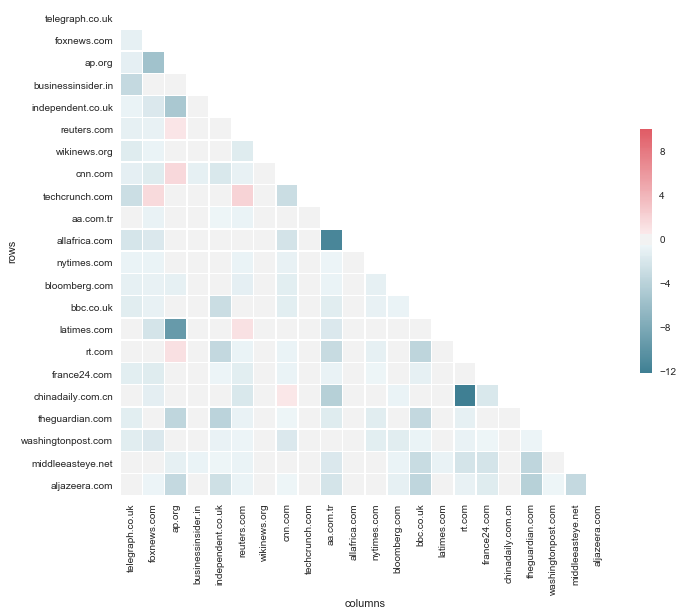

In [43]:
plot_estimated_graph(theta_estimated, sources)